In [11]:
import seaborn as sns

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Show the first few rows to confirm it is loaded
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first 5 rows
print(df.head())

# Check dataset info
print(df.info())

# Display summary statistics
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [2]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [3]:
# Rename columns for easier access
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [4]:
# Select the features for clustering
X = df[['Annual_Income', 'Spending_Score']]

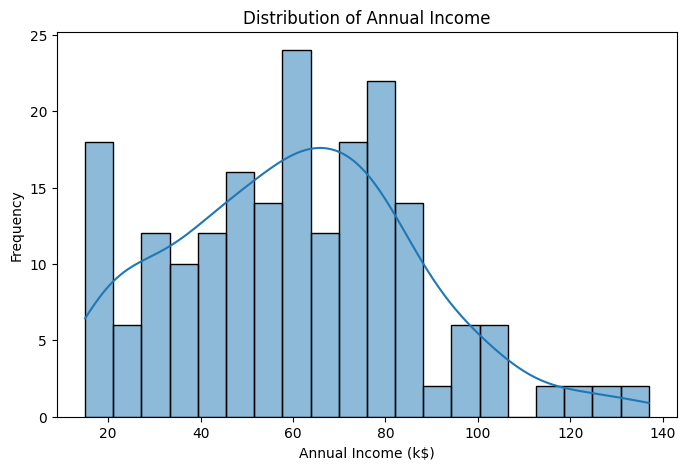

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Annual Income
plt.figure(figsize=(8,5))
sns.histplot(df['Annual_Income'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

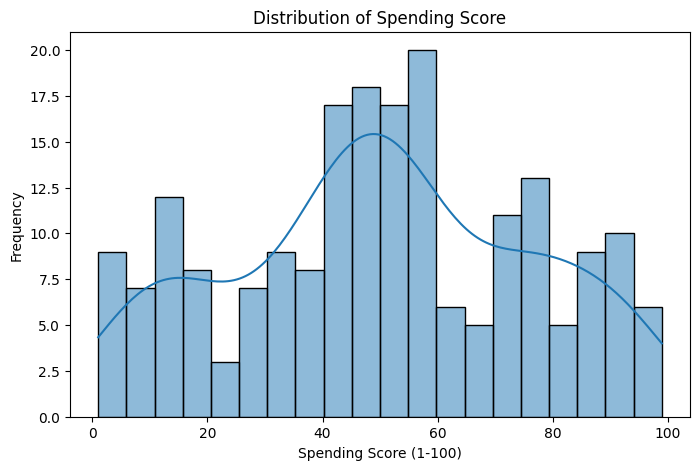

In [6]:
# Plot the distribution of Spending Score
plt.figure(figsize=(8,5))
sns.histplot(df['Spending_Score'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

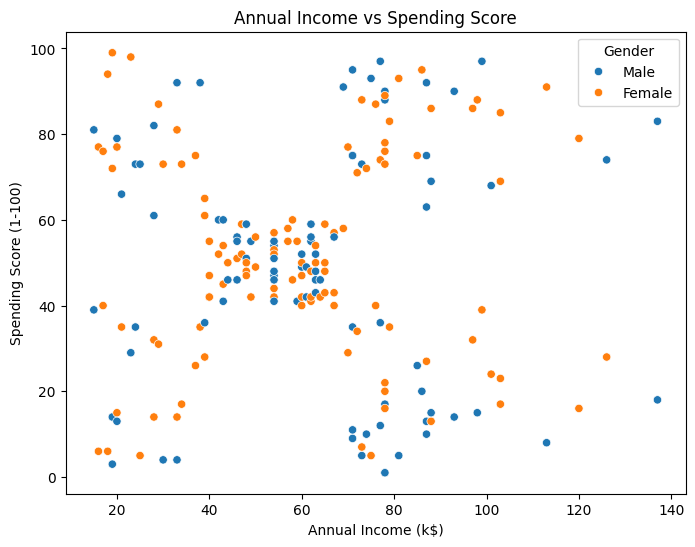

In [7]:
# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Gender'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

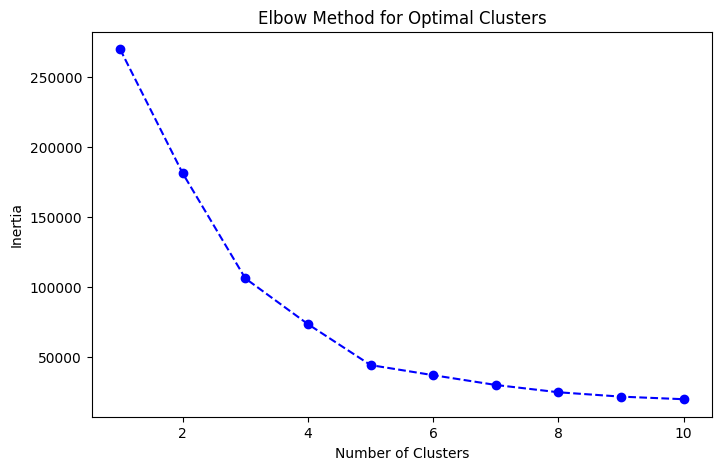

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Fix for warning
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [9]:
# Step 6: Apply K-Means Clustering
optimal_clusters = 5  # Change this based on the Elbow Method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Display first 5 rows to check the assigned clusters
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


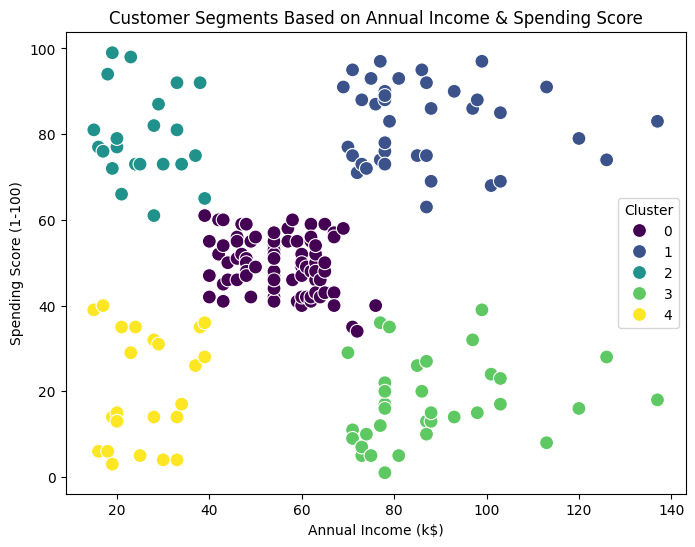

In [12]:
# Step 7: Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments Based on Annual Income & Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()